<a href="https://colab.research.google.com/github/wintera71/BEACO2N-Modules/blob/main/Lesson%202%3A%20Introduction%20to%20Pandas/EXPLORATION_Introduction_to_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BEACO2N Notebook 2b: Introduction to Pandas**

Notebook developed by: *Skye Pickett, Alec Morgan, Lan Dinh, Su Min Park, Amy Castillo*


### Learning Outcomes
Working through this notebook, you will learn about:
  1. Manipulating `DataFrames` and `Series`
  1. Importing CSV data into a *pandas* `DataFrame`
  1. Data analysis using *pandas*
  1. Creating visualizations with *pandas*


## Table of Contents
1. DataFrame Review
1. Data Analysis
> 2.1 Importing Data
<br> 2.2 Accessing Data
<br> 2.3 Manipulating Data
1. Data Visualizations
> 3.1 Plotting PM2.5 Concentrations
<br> 3.2 Plotting CO2 Concentrations
<br> 3.3 Plotting NO Concentrations
1. Conclusion

*Note: In this notebook, there are some more advanced topics that are "optional". This means you can just read over these sections; don't worry about fully understanding these parts unless you are really interested. They may be useful later in the course, but for now they are not necessary, so feel free to just skim the parts labelled "Optional"!*






<hr style="border: 2px solid #003262">
<hr style="border: 2px solid #C9B676">

##1. DataFrame Review

When we import data, we utilize the pandas library. We imported pandas in the *In Class* notebook through running this line of code: `import pandas as pd`. Since this is a different notebook than the *In Class* one, we need to import pandas here in order to be able to use Pandas tools in this notebook. **Run the cell!**

In [ ]:
from __future__ import print_function

import pandas as pd
pd.__version__

'2.2.2'

Let's do a brief overview of DataFrames from what we learned in the *In Class* notebook! We will most often import data from public sources. The data we import is most often in the form of an excel spreadsheet or a "csv". This stands for **comma separated value** file. Spreadsheets are easily converted to csv format!<br> It is however important to know the basics of creating a DataFrame from scratch. This is the syntax for making your own DataFrame:

>`pd.DataFrame`({**_<mark style="background-color: red;">"column_name1": column1_values</mark>_**, <mark style="background-color: yellow;">**"column_name2": column2_values,** ...}</mark>)

Let's see if you remember how to go about making your own...

**Your turn! Q1**<br>
Let's make another DataFrame.

I will provide you with 2 series; one per each of the 2 columns. Use the code from the In Class Notebook example with city names as an example to guide you! The steps are exactly the same format. <br>**Name one column `"Ice Cream Flavors"` and the second column `"Yumminess"`.**<br> **Replace the ... in the code cell below with your answer, then run the cell to see your DataFrame!**

In [ ]:
flavors = pd.Series(['strawberry', 'rocky road', 'vanilla bean'])
yum_level = pd.Series(['low', 'high', 'medium'])
pd.DataFrame({... : ..., ... : ...})

ValueError: If using all scalar values, you must pass an index

Great job! In the next section, we'll practice *importing* data into a DataFrame.

***
## 2. DataFrame Analysis



###2.1 Importing Data



Similarly to how we had to import Pandas again, we need to load in our data again in order to use it. Right under this is a hidden code cell that contains the code from the In Class notebook (where you see "Show code"). <br>**Run the cell below**, like you do with any other code cell, so we can utilize `wildfire_pm` again in this notebook!

In [ ]:
#@title
## Run this cell so we can use wildfire_pm
# This code is pasted from the In Class notebook

pm_data = "http://128.32.208.8/node/31/measurements_all/csv?name=Fred%20T.%20Korematsu%20Elementary%20School&interval=60&variables=pm2_5&start=2021-08-01%2012:00:00&end=2021-08-31%2023:00:00&chart_type=measurement"
wildfire_pm = pd.read_csv(pm_data, on_bad_lines='skip')
wildfire_pm['timestamp']=pd.to_datetime(wildfire_pm['local_timestamp'],format='%Y-%m-%d  %H:%M:%S')
wildfire_pm.index=wildfire_pm['timestamp']
wildfire_pm = wildfire_pm.drop(['local_timestamp','epoch','datetime','node_id','node_file_id', 'timestamp'],axis = 1)
wildfire_pm = wildfire_pm.rename(columns={'pm2_5': 'pm'})


#### 2.1.1 Importing CO2 Data

Let's take a look at **CO2 concentrations during August 2021**. This is the same time period as the data in the *In Class* notebook about wildfire particulate matter concentrations!<br> In the code cell below, we save the CO2 data source link to the `co2_data` variable. Similarly to how we did in the *In Class* notebook, use the `co2_data` variable to load the data into a DataFrame.

**Q2: Replace the ... with the variable name (that represents the url of the data file).**

In [ ]:
co2_data = "http://128.32.208.8/node/31/measurements_all/csv?name=Fred%20T.%20Korematsu%20Elementary%20School&interval=60&variables=co2_corrected_avg_t_drift_applied&start=2021-08-01%2012:00:00&end=2021-08-31%2023:00:00&chart_type=measurement"

# Replace ... with the variable name to load the data
wildfire_co2 = pd.read_csv(..., on_bad_lines='skip')
wildfire_co2

,local_timestamp,epoch,datetime,node_file_id,co2_corrected_avg_t_drift_applied,node_id
0,2021-08-01 12:00:00,1.627844e+09,2021-08-01 19:00:00,2155678,407.869369,31
1,2021-08-01 13:00:00,1.627848e+09,2021-08-01 20:00:00,2155715,407.901241,31
2,2021-08-01 14:00:00,1.627852e+09,2021-08-01 21:00:00,2155750,408.001317,31
3,2021-08-01 15:00:00,1.627855e+09,2021-08-01 22:00:00,2155827,407.734750,31
4,2021-08-01 16:00:00,1.627859e+09,2021-08-01 23:00:00,2155877,408.327487,31
...,...,...,...,...,...,...
724,2021-08-31 19:00:00,1.630462e+09,2021-09-01 02:00:00,2219863,408.833259,31
725,2021-08-31 20:00:00,1.630465e+09,2021-09-01 03:00:00,2219870,407.690634,31
726,2021-08-31 21:00:00,1.630469e+09,2021-09-01 04:00:00,2219962,408.374617,31
727,2021-08-31 22:00:00,1.630472e+09,2021-09-01 05:00:00,2220001,411.327623,31



Again, we want to clean and format the data to only look at the `timestamp` and the `co2` values. Run the following cell to clean and format the data for the CO2 pollutant from the California wildfires from August 2021. You **do not** need to undertand the code and what it does.

In [ ]:
# Formats the timestamp column
wildfire_co2['timestamp']=pd.to_datetime(wildfire_co2['local_timestamp'],format='%Y-%m-%d  %H:%M:%S')
wildfire_co2.index=wildfire_co2['timestamp']

# Drop all columns except the ones we want: timestamp and co2
wildfire_co2 = wildfire_co2.drop(['local_timestamp','epoch','datetime','node_id','node_file_id', 'timestamp'],axis = 1)

# Renaming the columns of the dataframe
wildfire_co2 = wildfire_co2.rename(columns={'co2_corrected_avg_t_drift_applied': 'co2'})
wildfire_co2

,co2
timestamp,
2021-08-01 12:00:00,407.869369
2021-08-01 13:00:00,407.901241
2021-08-01 14:00:00,408.001317
2021-08-01 15:00:00,407.734750
2021-08-01 16:00:00,408.327487
...,...
2021-08-31 19:00:00,408.833259
2021-08-31 20:00:00,407.690634
2021-08-31 21:00:00,408.374617


#### 2.1.2 Importing NO Data

Let's also load in **NO concentrations** from the same time period. The cell below saves the link we are pulling the NO data from and saves it to the `no_data` variable. Similarly to how we did above, use the `no_data` varaible to load the data into a DataFrame. <br>**Q3: Replace the ... with the variable name.**

In [ ]:
no_data = "http://128.32.208.8/node/31/measurements_all/csv?name=Fred%20T.%20Korematsu%20Elementary%20School&interval=60&variables=no_corrected_new_no_negatives&start=2021-08-01%2012:00:00&end=2021-08-31%2023:00:00&chart_type=measurement"

# Replace ... with the variable name to load the data
wildfire_no = pd.read_csv(..., on_bad_lines='skip')
wildfire_no

,local_timestamp,epoch,datetime,node_file_id,no_corrected_new_no_negatives,node_id
0,2021-08-01 12:00:00,1.627844e+09,2021-08-01 19:00:00,2155678,2.866536,31
1,2021-08-01 13:00:00,1.627848e+09,2021-08-01 20:00:00,2155715,2.438883,31
2,2021-08-01 14:00:00,1.627852e+09,2021-08-01 21:00:00,2155750,1.779716,31
3,2021-08-01 15:00:00,1.627855e+09,2021-08-01 22:00:00,2155827,1.536590,31
4,2021-08-01 16:00:00,1.627859e+09,2021-08-01 23:00:00,2155877,1.358038,31
...,...,...,...,...,...,...
724,2021-08-31 19:00:00,1.630462e+09,2021-09-01 02:00:00,2219863,0.305363,31
725,2021-08-31 20:00:00,1.630465e+09,2021-09-01 03:00:00,2219870,0.264785,31
726,2021-08-31 21:00:00,1.630469e+09,2021-09-01 04:00:00,2219962,0.665146,31
727,2021-08-31 22:00:00,1.630472e+09,2021-09-01 05:00:00,2220001,1.091189,31


Again, we want to clean and format the data to only look at the `timestamp` and the `no` values. Run the following cell to clean and format the data for the NO pollutant from the California wildfires from August 2021. You **do not** need to undertand the code and what it does.

In [ ]:
# Drop all columns except the ones we want: timestamp and NO
wildfire_no['timestamp']=pd.to_datetime(wildfire_no['local_timestamp'],format='%Y-%m-%d  %H:%M:%S')
wildfire_no.index=wildfire_no['timestamp']

# Drop all columns except the ones we want: timestamp and NO
wildfire_no = wildfire_no.drop(['local_timestamp','epoch','datetime','node_id','node_file_id', 'timestamp'],axis = 1)

# Renaming the columns of the dataframe
wildfire_no = wildfire_no.rename(columns={'no_corrected_new_no_negatives': 'no'})
wildfire_no[:10]

,no
timestamp,
2021-08-01 12:00:00,2.866536
2021-08-01 13:00:00,2.438883
2021-08-01 14:00:00,1.779716
2021-08-01 15:00:00,1.536590
2021-08-01 16:00:00,1.358038
2021-08-01 17:00:00,1.277841
2021-08-01 18:00:00,1.209827
2021-08-01 19:00:00,1.050961
2021-08-01 20:00:00,0.435321


### 2.2 Accessing Data

Often times DataFrames are quite large and contain many rows and columns, some of which are not relevant to the problem at hand. In these cases, it is useful to look just at specific parts of the DataFrames. This process is often referred to as **indexing or slicing**. There are a few ways that you can do this!

#### 2.2.1 Bracket extracting
The `[]` operator is one way that you can access specific columns/series. You can use pass in a column name into the brackets to extract the values of a certain column.

>**`dataframe_name["column_name"]` returns the column as a `Series`**. <br>*Reminder:* There must be quotation marks (`' '` or `" "`) around the column name.

Let's extract the `'pm'` column from the `wildfire_pm` DataFrame and save the series to the variable `pm`.<br>This column represents the wildfire particulate matter concentrations.

In [ ]:
# This sets the variable pm to the Series containing the pm values
pm = wildfire_pm['pm']
pm

timestamp
2021-08-01 12:00:00    1.89882
2021-08-01 13:00:00    1.57583
2021-08-01 14:00:00    2.00943
2021-08-01 15:00:00    1.52706
2021-08-01 16:00:00    1.22749
                        ...   
2021-08-31 19:00:00    4.32151
2021-08-31 20:00:00    5.30118
2021-08-31 21:00:00    4.74171
2021-08-31 22:00:00    3.55556
2021-08-31 23:00:00    4.61466
Name: pm, Length: 729, dtype: float64

We can even use the `[]` operator on a `Series` to select a certain item from the column by inputting a certain index inside the brackets.

In [ ]:
pm[1]

1.57583


Notice how `pm[1]` gives us the second item and not the first? This is because `pandas` defaults to something called **zero-indexing**, where the first item is considered index 0, the second item is at index 1, so on and so forth...<br>Thus, in order to extract the PM value in the first row of the DataFrame (*or* equivalently, the first value of the series that represents the `'pm'` column), we need to use the *0th* index.

In [ ]:
pm[0]

1.89882

Now we have the first value from the series seen above!

We can even input a starting index *and* ending index inside of the brackets to get multiple elements! The following code will output the items starting from index 0 and will grab all the elements at every index *up to* the element at the 4th index -- excluding the element at the 4th index.

In [ ]:
pm[0:4]

timestamp
2021-08-01 12:00:00    1.89882
2021-08-01 13:00:00    1.57583
2021-08-01 14:00:00    2.00943
2021-08-01 15:00:00    1.52706
Name: pm, dtype: float64

Experiment with different inputs to the bracket operator yourself and see what it outputs! Try to anticipate what the output will look like.

In [ ]:
# Replace the 0 and 4 with any numbers you want
pm[...:...]

timestamp
2021-08-01 12:00:00    1.89882
2021-08-01 13:00:00    1.57583
2021-08-01 14:00:00    2.00943
2021-08-01 15:00:00    1.52706
Name: pm, dtype: float64

#### 2.2.2 `.iloc`
Another way to extract values is using `.iloc`. This function allows us to access specific *rows*. We can input a single integer representing which row we want or a list of integers if we want to select multiple rows!

If we wanted to grab the very first row (the row with index 0), we would run:

In [ ]:
wildfire_pm.iloc[0]

pm    1.89882
Name: 2021-08-01 12:00:00, dtype: float64

This results in the `'pm'` value and the `'timestamp'` values of the first row.<br>We can see the row `1` is at position `0`, row `2` would be position `1`, ... and so on so forth with row `n` being at position `n-1` (again, this is called zero-indexing!).

The following cell accesses rows at positions `0`, `4`, `2` from our `wildfire_pm` data and outputs them in the specified order!

In [ ]:
wildfire_pm.iloc[[0,4,2]]

,pm
timestamp,
2021-08-01 12:00:00,1.89882
2021-08-01 16:00:00,1.22749
2021-08-01 14:00:00,2.00943


**Your turn! Q4**
<br>**Fill in the `...` with first 10 rows of the wildfire_pm DataFrame.**
>*Hint:* `dataframe_name.iloc[0:4]` returns 4 rows.

In [ ]:
#Replace ... with the first 10 rows from wildfire_pm
wildfire_pm.iloc[...:...]

,pm
timestamp,
2021-08-01 12:00:00,1.89882
2021-08-01 13:00:00,1.57583
2021-08-01 14:00:00,2.00943
2021-08-01 15:00:00,1.52706


*Advanced/Optional:*<br>In addition, *pandas* provides an extremely rich API for advanced [selection](http://pandas.pydata.org/pandas-docs/stable/indexing.html) that is too extensive to be covered here.

### 2.3 Manipulating Data

We can also apply Python's basic arithmetic operations to `Series`!

For example, run the cell below:

In [ ]:
pm / 1000

timestamp
2021-08-01 12:00:00    0.001899
2021-08-01 13:00:00    0.001576
2021-08-01 14:00:00    0.002009
2021-08-01 15:00:00    0.001527
2021-08-01 16:00:00    0.001227
                         ...   
2021-08-31 19:00:00    0.004322
2021-08-31 20:00:00    0.005301
2021-08-31 21:00:00    0.004742
2021-08-31 22:00:00    0.003556
2021-08-31 23:00:00    0.004615
Name: pm, Length: 729, dtype: float64

This divided each of the values that were in the `pm` series (the `'pm`` column) by 1000.

**Q5: Use the cell below to multiply the particulate matter (`pm`) values by 100.**
>Reminder: The multiplication symbol is *

In [ ]:
### Q5: Put your code here!

**Q6: Use the cell below to add 1 to the particulate matter (`pm`) values.**

In [ ]:
### Q6: Put your code here!

#### 2.3.1 NumPy
[NumPy](http://www.numpy.org/) is a popular toolkit for scientific computing. <br>We learned about NumPy in the Modules section of our Introduction to Colab and Python notebook. *Pandas* `Series` can be used as arguments (inputs) to most NumPy functions.
> Here we're using the *log* function with `np.log(<series_name>)`.

In [ ]:
import numpy as np ## We have to import numpy first to be able to use its tools!

log_pm = np.log(pm)
log_pm

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


timestamp
2021-08-01 12:00:00    0.641233
2021-08-01 13:00:00    0.454782
2021-08-01 14:00:00    0.697851
2021-08-01 15:00:00    0.423344
2021-08-01 16:00:00    0.204971
                         ...   
2021-08-31 19:00:00    1.463605
2021-08-31 20:00:00    1.667929
2021-08-31 21:00:00    1.556398
2021-08-31 22:00:00    1.268513
2021-08-31 23:00:00    1.529238
Name: pm, Length: 729, dtype: float64

**Q7: Above we've saved the log of the `pm` values to the variable `log_pm`. In the cell below, write a mathematical expression that inverses the log and returns the *same* values as `pm`. Set your expression equal to `q7` so you can check your answer.**
>*Hints:*<br>- Remember to use `log_pm`, not `pm` in this question!<br>- What is the opposite operation of taking a natural log? (FYI `np.log` is the same as *ln* on a calculator -- it has base e)<br> - There are two approaches. You'll need to know at least one of these for this question:<br>
  * the mathematical number *e* can be accessed by `np.e`
  * the `**` operator
  * there is a built-in function, `np.exp(__)`, that calculates e to the power of what is put in the parentheses

In [ ]:
### Q7: Put your code in the ...!
q7 = ...
q7

Ellipsis

In [ ]:
# Run this cell to check your answer!

try:
  if type(q7) != pd.core.series.Series:
    print("You haven't set anything to q7. Put your expression in the ... next to 'q7 =''.")
  elif q7[0] == 0.641233:
    print("Incorrect. Your answer still has the same values as log_pm (the log of the pm values).")
  elif round(q7[0], 5) == 1.89882:
    print("Correct! Good job!")
  else:
    print("Incorrect. Check your work :)")
except NameError:
  print("You haven't run the code cell where you defined 'q7 = ___'.")


You haven't set anything to q7. Put your expression in the ... next to 'q7 =''.


***
## 3. Data Visualizations

### 3.1 Plotting PM2.5 Concentrations

A common visualization is a lineplot.
 There exists a function, **`DataFrame.plot`**, that takes in two parameters `x` and `y`. These are the names of corresponding **columns for the x-axis and y-axis**.

 By default, `.plot` plots based on the **index**, which for `wildfire_pm` is the `timestamp` column. In the next notebook, we will discuss more about indexing! Since our table has data as the index, we can *just* input the `y` data. The cell below plots a lineplot that uses `pm` for the y-axis to plot a lineplot from `wildfire_pm` data over the entire month of August.

 Since we're also adding axis labels and a title, we'll need another package, called **`matplotlib.pyplot`**, so we need to import it! Run the cell below to import matplotlib.pyplot as `plt`.

In [ ]:
import matplotlib.pyplot as plt

Now, let's create the PM2.5 (particulate matter) Time Series graph! Read through each line of code below and run the cell to produce the plot.

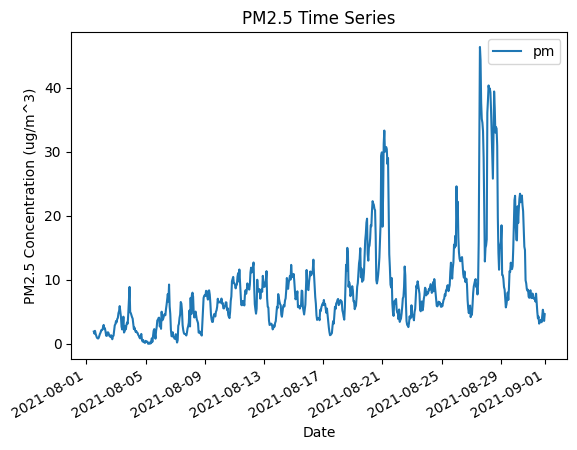

In [ ]:
wildfire_pm.plot(y='pm')
plt.xlabel("Date");
plt.ylabel("PM2.5 Concentration (ug/m^3)");
plt.title("PM2.5 Time Series");

**Q8: Based on this graph, when do you think the wildfire period was? What makes you think so?**

DOUBLE CLICK on this text cell to edit this cell and replace this sentence with your answer.

### 3.2 Plotting CO2 Concentrations


**Your turn! Q9**<br>
**Create a lineplot showing the time series of *CO2 concentrations*. In the cell below, using `wildfire_co2` write the code to create a lineplot based on the column named `co2`. Be sure to label the x-axis (y-axis label is provided) and give your plot a descriptive title.**


>*Hint: If you are stuck, feel free to refer back to the previous code we used to create the time series for PM data!*

In [ ]:
# Write your code here to make a time series plot of the CO2 concentrations

...
plt.xlabel(...);
plt.ylabel("CO2 Concentration (parts per million)");
plt.title(...);


Great work!

### 3.3 Plotting NO Concentrations



Time to create one last lineplot!<br>
**Q10: Create a lineplot showing the time series of *NO concentrations*. In the cell below, using `wildfire_no` write the code to create a lineplot based on the column named `no`. Be sure to label the x-axis (y-axis label is provided) and give your plot a descriptive title.**


>*Hint: If you are stuck, feel free to refer back to the previous code we used to create the time series for PM data!*

In [ ]:
# Write your code here to make a time series plot of the NO concentrations

...
plt.xlabel(...);
plt.ylabel("NO Concentration (parts per million)");
plt.title(...);


You're on a roll! Great work with plotting!

**Q10: Scroll up to view all 3 of your plots and write at least 3 observations comparing them below.**

DOUBLE CLICK on this text cell to edit this cell and replace this sentence with your answer.

***
##4. Conclusion
In this notebook, you learned about:
- The pandas library
  - Series and DataFrames
  - Manipulating data
  - Importing data to DataFrames
- Visualizing data
  - Creating lineplots from DataFrames
  - Labelling lineplots
  - Understanding lineplots and making observations


#### You've finished the **Introduction to Pandas *Student Exploration* notebook**. Good job! Congratulations on finishing the **Introduction to Pandas** lesson!

<hr style="border: 2px solid #003262">
<hr style="border: 2px solid #C9B676">